# Preprocessing Data for Sentiment Analysis

In [4]:
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import twitter_samples
import random

In [5]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/shielasandoval/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [6]:
twitter_samples.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [7]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [10]:
print(len(positive_tweets), len(negative_tweets))

5000 5000


In [11]:
print(type(positive_tweets), type(negative_tweets))

<class 'list'> <class 'list'>


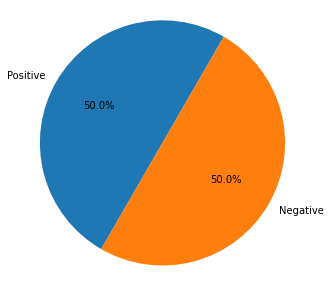

In [18]:
# let's visualise the datasets!

figure = plt.figure(figsize=(5,5))
labels = ['Positive', 'Negative']
sizes = [len(positive_tweets), len(negative_tweets)]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=60)
plt.axis('equal')
plt.show()

In [23]:
# taking a peek at the tweets

print('Positive sample: ', positive_tweets[random.randint(0, len(positive_tweets))])
print('Negative sample: ', negative_tweets[random.randint(0, len(negative_tweets))])

Positive sample:  @CocoaBrownTan @FuschiaEffect I'm glowing this morning! Yayyyy :))) happy Friday! Xx
Negative sample:  @ReddBlock1 @MadridGamesWeek Too far away :(


## Preprocess only one sample

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shielasandoval/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [63]:
tweet = positive_tweets[random.randint(0, len(positive_tweets))]
tweet

'Check out my ride in #CSRRacing for Android! Try it for FREE!\nhttp://t.co/XVIgThe1j3 a new one :) http://t.co/fLbjhBYcEY'

### Remove hyperlinks and other styling

In [64]:
print(tweet)

Check out my ride in #CSRRacing for Android! Try it for FREE!
http://t.co/XVIgThe1j3 a new one :) http://t.co/fLbjhBYcEY


In [66]:
# Old retweets have the text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)
print(tweet2)

Check out my ride in #CSRRacing for Android! Try it for FREE!
http://t.co/XVIgThe1j3 a new one :) http://t.co/fLbjhBYcEY


In [68]:
# Remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)
print(tweet2)

Check out my ride in #CSRRacing for Android! Try it for FREE!
 a new one :) 


In [69]:
# Remove hashtags
tweet2 = re.sub(r'#', '', tweet2)
print(tweet2)

Check out my ride in CSRRacing for Android! Try it for FREE!
 a new one :) 


### Tokenize

In [70]:
tokenizer = TweetTokenizer(preserve_case=False,
                           strip_handles=True,
                           reduce_len=True)

tweet_tokens = tokenizer.tokenize(tweet2)
print('Tokenized string:')
print(tweet_tokens)

Tokenized string:
['check', 'out', 'my', 'ride', 'in', 'csrracing', 'for', 'android', '!', 'try', 'it', 'for', 'free', '!', 'a', 'new', 'one', ':)']


### Remove stopwords and punctuation

In [71]:
stopwords_english = stopwords.words('english')
print('Stopwords: ', stopwords_english)

Stopwords:  ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [72]:
print('Punctuation: ', string.punctuation)

Punctuation:  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [75]:
cleaned_tokens = []

for token in tweet_tokens:
    if (token not in stopwords_english and
        token not in string.punctuation):
            cleaned_tokens.append(token)
            
print('Removed stopwords and punctuation:')
print(cleaned_tokens)

Removed stopwords and punctuation:
['check', 'ride', 'csrracing', 'android', 'try', 'free', 'new', 'one', ':)']


### Stemming

In [79]:
stemmer = PorterStemmer()

stem_tokens = [stemmer.stem(t) for t in cleaned_tokens]
print('Stemmed tokens:')
print(stem_tokens)

Stemmed tokens:
['check', 'ride', 'csrrace', 'android', 'tri', 'free', 'new', 'one', ':)']
